<a href="https://colab.research.google.com/github/GabrielTB1/Pandas_IO/blob/main/Pandas_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando os nomes

In [2]:
import pandas as pd

In [3]:
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')

In [4]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
40,APARECIDA,0,303020,41,F
43,TEREZINHA,0,298311,44,F
81,MICHELE,0,200531,82,F
33,NATALIA,0,334157,34,F
34,CRISTIANE,0,327248,35,F


In [5]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
53,RONALDO,0,269489,54,M
47,JULIO,0,334254,48,M
59,MANUEL,0,253031,60,M
179,IAGO,0,73618,180,M
98,GILSON,0,144341,99,M


In [6]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [7]:
frames = [nomes_f, nomes_m]

In [8]:
nomes = pd.concat(frames)['nome'].to_frame()

In [9]:
nomes.sample(5)

,nome
29,RENATA
182,CHARLES
148,JANETE
70,ISABELA
53,RONALDO


# Incluindo ID dos alunos

In [10]:
import numpy as np
np.random.seed(123)

In [11]:
total_alunos = len(nomes)
total_alunos

400

In [12]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [13]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [14]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [15]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [16]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [17]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a tabela Cursos

In [18]:
!pip3 install html5lib
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import html5lib

In [20]:
# URLS utilizadas nas aulas estão indisponiveis
# url = 'http://tabela-cursos.herokuapp.com/index.html'
# cursos = pd.read_html(url)
# cursos

In [21]:
lista = ['Lógica de programação', 'Java para Web', 'C# para Web',
         'Ruby on Rails', 'Cursos de Python', 'PHP com MySql', 'NET para web',
         'Novas integrações com Java', 'TDD com Java', 'Código limpo com C#',
         'Preparatório para certificação Java', 'Hardware básico',
         'Persistência com .NET', 'Desenvolvendo jogos', 'Análise de dados',
         'Estatística básica', 'Internet das coisas', 'Programação funcional',
         'Boas práticas em Java', 'Orientação objetos com Java']
cursos = pd.DataFrame(lista, columns = ['Nome do curso'])
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [22]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [23]:
cursos.head(5)

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [24]:
cursos['id'] = cursos.index + 1

In [25]:
cursos.head(5)

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [26]:
cursos = cursos.set_index('id')

In [27]:
cursos.head(5)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [28]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


In [29]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos)* 1.5).astype(int)

In [30]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
133,RUAN,130,@servicodoemail.com,ruan@servicodoemail.com,1
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,1
50,RAFAELA,27,@dominiodoemail.com.br,rafaela@dominiodoemail.com.br,1
45,ADRIANO,196,@servicodoemail.com,adriano@servicodoemail.com,2
117,PAMELA,189,@dominiodoemail.com.br,pamela@dominiodoemail.com.br,1


In [31]:
nomes.matriculas.describe()

count    400.000000
mean       2.147500
std        1.619352
min        1.000000
25%        1.000000
50%        1.500000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [32]:
import seaborn as sns

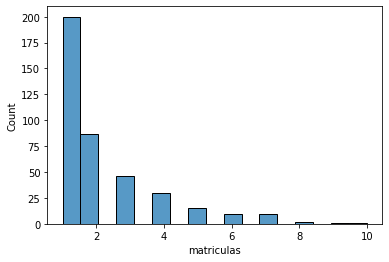

In [33]:
sns.histplot(nomes.matriculas)

In [34]:
nomes.matriculas.value_counts()

1     200
2      87
3      46
4      30
5      15
7       9
6       9
8       2
9       1
10      1
Name: matriculas, dtype: int64

In [36]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
97,BARBARA,201,@servicodoemail.com,barbara@servicodoemail.com,1
170,ALEXANDRO,341,@servicodoemail.com,alexandro@servicodoemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,2
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
138,NEUSA,75,@dominiodoemail.com.br,neusa@dominiodoemail.com.br,2


# Selecionando cursos

In [37]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
34,CRISTIANE,350,@dominiodoemail.com.br,cristiane@dominiodoemail.com.br,1
154,NICOLE,182,@dominiodoemail.com.br,nicole@dominiodoemail.com.br,2
191,TERESA,264,@dominiodoemail.com.br,teresa@dominiodoemail.com.br,1


In [38]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [41]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno','id_curso'])

In [43]:
matriculas.head(5)

,id_aluno,id_curso
0,235,19
1,235,19
2,43,9
3,43,1
4,43,19


In [45]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,114,Lógica de programação
2,121,Java para Web
3,60,C# para Web
4,90,Ruby on Rails
5,128,Cursos de Python
6,26,PHP com MySql
7,89,NET para web
8,65,Novas integrações com Java
9,130,TDD com Java


In [46]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
83,RENAN,9,@dominiodoemail.com.br,renan@dominiodoemail.com.br,1
137,AUGUSTO,376,@dominiodoemail.com.br,augusto@dominiodoemail.com.br,1
183,MARLON,74,@servicodoemail.com,marlon@servicodoemail.com,1


In [47]:
cursos.head(5)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [48]:
matriculas.head(5)

,id_aluno,id_curso
0,235,19
1,235,19
2,43,9
3,43,1
4,43,19


In [49]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [51]:
matriculas_por_curso.head(5)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,114,Lógica de programação
2,121,Java para Web
3,60,C# para Web
4,90,Ruby on Rails
5,128,Cursos de Python


# Saída em diferente formatos

In [52]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,114,Lógica de programação
2,121,Java para Web
3,60,C# para Web


In [57]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [58]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,114,Lógica de programação
1,121,Java para Web
2,60,C# para Web
3,90,Ruby on Rails
4,128,Cursos de Python
5,26,PHP com MySql
6,89,NET para web
7,65,Novas integrações com Java
8,130,TDD com Java
9,22,Código limpo com C#


In [59]:
matriculas_json = matriculas_por_curso.to_json()

In [60]:
matriculas_json

'{"quantidade_de_alunos":{"1":114,"2":121,"3":60,"4":90,"5":128,"6":26,"7":89,"8":65,"9":130,"10":22,"11":175,"12":46,"13":96,"14":70,"15":158,"16":30,"17":85,"18":34,"19":136,"20":43},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":"NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [61]:
matriculas_html = matriculas_por_curso.to_html()

In [63]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>114</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>121</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>60</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>90</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>128</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>26</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>89</td>
      <td>NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>65</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>130</t

# Criando o banco SQL

In [64]:
!pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
from sqlalchemy import create_engine, MetaData, Table, inspect

In [66]:
engine = create_engine('sqlite:///:memory:')

In [67]:
engine

Engine(sqlite:///:memory:)

In [68]:
type(engine)

sqlalchemy.engine.base.Engine

In [70]:
matriculas_por_curso.to_sql('matriculas', engine)

In [71]:
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


# Buscando do banco SQL

In [80]:
query = 'select * from matriculas where quantidade_de_alunos < 40'

In [82]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,6,26,PHP com MySql
1,10,22,Código limpo com C#
2,16,30,Estatística básica
3,18,34,Programação funcional


In [83]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,114
1,Java para Web,121
2,C# para Web,60
3,Ruby on Rails,90
4,Cursos de Python,128
5,PHP com MySql,26
6,NET para web,89
7,Novas integrações com Java,65
8,TDD com Java,130
9,Código limpo com C#,22


In [85]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [90]:
muitas_mattriculas = muitas_matriculas.query('quantidade_de_alunos > 150')

In [91]:
muitas_mattriculas

,nome_do_curso,quantidade_de_alunos
10,Preparatório para certificação Java,175
14,Análise de dados,158


# Escrevendo no banco

In [92]:
muitas_mattriculas.to_sql('muitas_matriculas',con = engine)

In [93]:
inspector = inspect(engine)
print(inspector.get_table_names())

['matriculas', 'muitas_matriculas']
